In [1]:
#load data
import yt
import numpy as np
import numpy.linalg as la


from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper
from yt.visualization.volume_rendering.api import Scene, Camera, VolumeSource


locs = np.genfromtxt('data/elsa-grid100-bw01-locs.csv', delimiter=' ')
x = np.genfromtxt('data/elsa-grid100-bw01-gridx.csv', delimiter=' ')
y = np.genfromtxt('data/elsa-grid100-bw01-gridy.csv', delimiter=' ')
z = np.genfromtxt('data/elsa-grid100-bw01-gridz.csv', delimiter=' ')
d = np.genfromtxt('data/elsa-grid100-bw01-density.csv', delimiter=' ')
hom = np.genfromtxt('data/elsa-grid100-bw01-hom.csv', delimiter=' ')

print x.shape
d = np.reshape(d, [ x.shape[0], y.shape[0], z.shape[0]])
#d = np.log(1+d)
#d = np.max(d) - d

data = dict(density = 1+d )#, 
           # number_of_particles = locs.shape[0],
           # particle_position_x = (locs[:,0], 'code_length'), 
           # particle_position_y = (locs[:,1], 'code_length'),
           # particle_position_z = (locs[:,2], 'code_length'))

xmin = np.min(x)
xmax = np.max(x)
xd = xmax-xmin
ymin = np.min(y)
ymax = np.max(y)
yd = ymax-ymin
zmin = np.min(z)
zmax = np.max(z)
zd = zmax-zmin

bbox = np.array([ [xmin - 0.001*xd, xmax+0.001*xd],
                  [ymin - 0.001*yd, ymax+0.001*yd], 
                  [zmin - 0.001*zd, zmax+0.001*zd] ] )



(100,)


yt : [INFO     ] 2016-02-29 16:35:38,949 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-29 16:35:38,949 Parameters: domain_dimensions         = [100 100 100]
yt : [INFO     ] 2016-02-29 16:35:38,950 Parameters: domain_left_edge          = [-0.86143257 -0.70880527  0.05018268]
yt : [INFO     ] 2016-02-29 16:35:38,951 Parameters: domain_right_edge         = [-0.00571875  0.5993876   1.00094887]
yt : [INFO     ] 2016-02-29 16:35:38,952 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-02-29 16:35:39,199 Setting default field to ('gas', 'density')
yt : [INFO     ] 2016-02-29 16:35:39,200 Creating default volume
yt : [INFO     ] 2016-02-29 16:35:39,277 Creating default transfer function
yt : [INFO     ] 2016-02-29 16:35:39,279 Calculating data bounds. This may take a while.  Set the .bounds to avoid this.
yt : [INFO     ] 2016-02-29 16:35:39,321 Rendering scene (Can take a while).


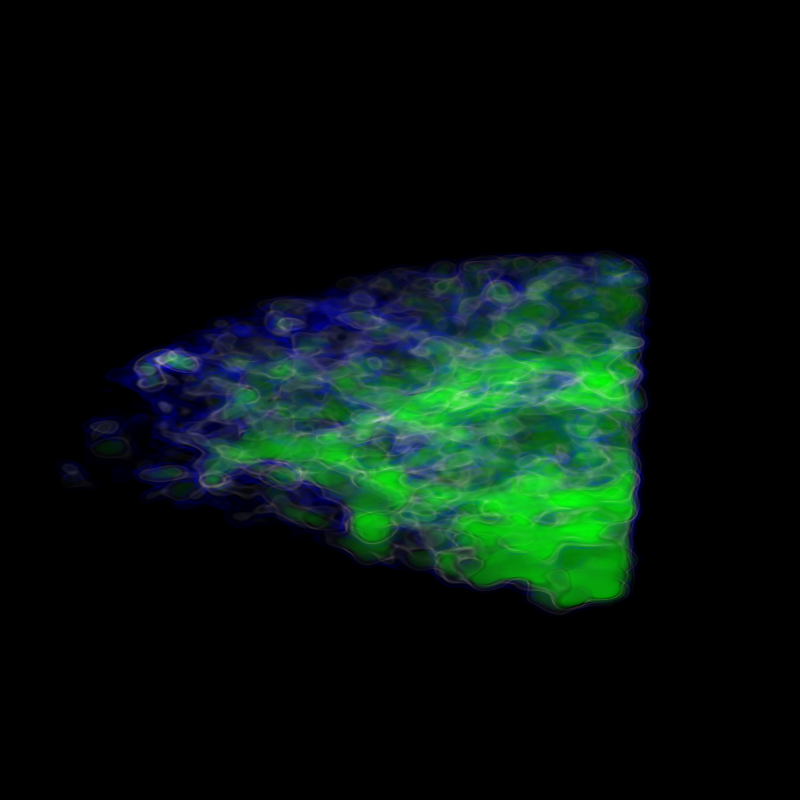

In [28]:
import numpy.linalg as la



#create volume rendering
ds = yt.load_uniform_grid(data, d.shape, length_unit='cm', bbox=bbox, nprocs=10 )


#position based on homology
h =  hom[5,:]
sh = np.log10( np.max(d) - h[0] )
eh = np.log10( np.max(d) - h[1] )
north = np.array( h[9:12] - h[12:15] )
width = np.repeat( 3. * np.max( np.abs( 3. * north ) ), 3 )
north /= la.norm( north )

ortho = np.array( [1., 1. ,1. ] )
ortho /= la.norm( ortho )
ortho = ortho - north * np.dot( north, ortho )
ortho /= la.norm( ortho )

mid = np.array( h[12:15] + h[9:12]/2. )


#ceraete scene 
sc = yt.create_scene(ds)

sh = 0.4
eh = 0.2
tf = sc.get_source(0).transfer_function
tf.clear()
tf.add_step(start=sh, stop=1, value=[0.,1.,0.,10.])

tf.add_step(start=0., stop=eh, value=[0.,0.,0.,5.])

yt.make_colormap([('blue', 20), ('white', 20), ('green', 20)],
                 name='bwg', interpolate=False)
tf.add_layers(3, 0.001, mi=eh, ma=sh, col_bounds = [eh, sh],
     alpha=10*np.ones(3,dtype='float64'), colormap = 'bwg')
#tf.map_to_colormap( eh, sh,
#    scale=1.0, colormap='RdBu_r')

#tf.grey_opacity = True

cam = sc.camera



#cam.position =  mid + ortho * 0.01
#cam.focus = ds.arr( mid, 'code_length')
#cam.north_vector = north
cam.resolution = (800, 800)
#cam.set_width( ds.arr( width, 'code_length') )
sc.render()
sc.show()

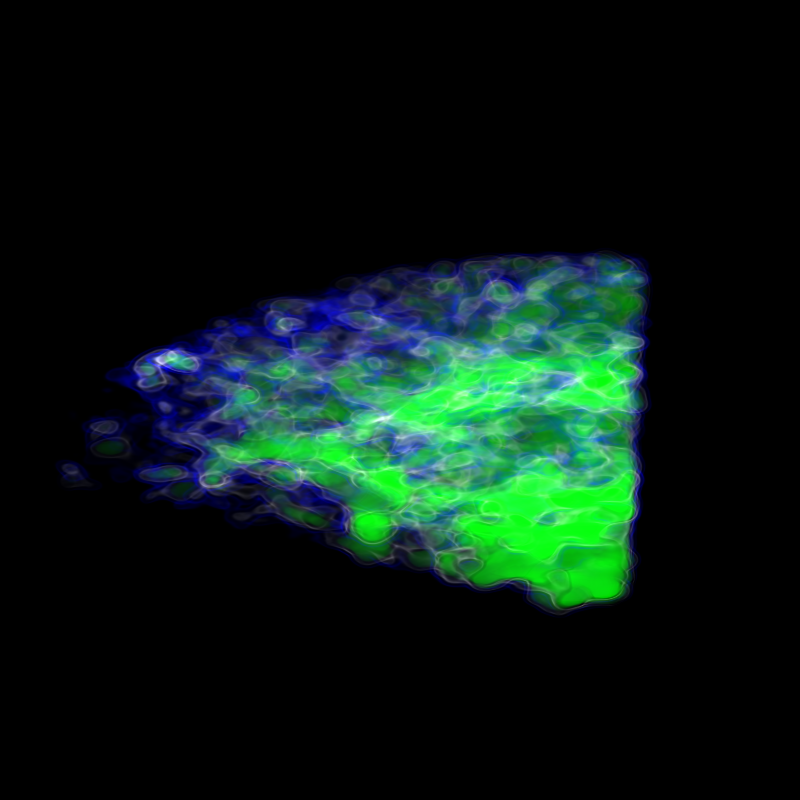

In [29]:
sc.show(sigma_clip=3)

yt : [INFO     ] 2016-02-29 15:18:51,977 Rendering scene (Can take a while).


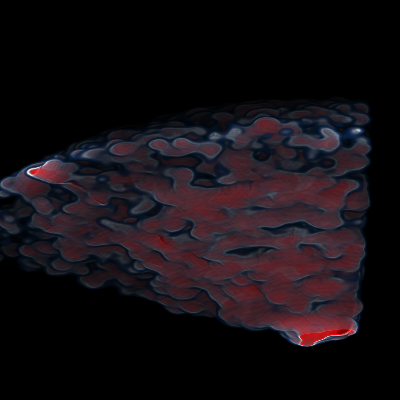

In [224]:
cam.zoom(1.2)
sc.render()
sc

In [238]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

ad = ds.all_data()
surface = ds.surface(ad, "density", 4.5)

fig = plt.figure()
ax = fig.gca(projection='3d')
p3dc = Poly3DCollection(surface.triangles, linewidth=0.0)
ax.add_collection(p3dc)
max_extent = (surface.vertices.max(axis=1) - surface.vertices.min(axis=1)).max()
centers = (surface.vertices.max(axis=1) + surface.vertices.min(axis=1)) / 2
bounds = np.zeros([3,2])
bounds[:,0] = centers[:] - max_extent/2
bounds[:,1] = centers[:] + max_extent/2
ax.auto_scale_xyz(bounds[0,:], bounds[1,:], bounds[2,:])
fig.show()

yt : [INFO     ] 2016-02-29 15:36:38,154 Extracting (sampling: None)


In [232]:
np.max(d)

4.9891853613183503

In [236]:
10**0.4

2.51188643150958